<a href="https://colab.research.google.com/github/lipzy13/PelUang-ML/blob/main/PelUangNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [129]:
df = pd.read_csv('/content/Dataset maps - Dataset.csv')

In [154]:
df = df.drop(['Bencana (1-3)'], axis=1)

KeyError: ignored

In [155]:
print(df)

     LATITUDE   LONGITUDE     ID  Dekat_Sekolah  Dekat_Rumah_Sakit  \
0   -6.103911  106.939590    2.0              0                  1   
1   -6.109130  106.939307    3.0              1                  0   
2   -6.110013  106.926087    4.0              1                  1   
3   -6.108875  106.929053    5.0              1                  0   
4   -6.127213  106.917113    6.0              0                  1   
..        ...         ...    ...            ...                ...   
442 -6.150627  106.778294  446.0              1                  0   
443 -6.150482  106.781050  447.0              1                  0   
444 -6.178257  106.782487  448.0              1                  0   
445 -6.178203  106.785027  449.0              1                  0   
446 -6.173735  106.783144  450.0              0                  0   

     Dekat_Pasar  Dekat_Rumah_Warga  Fasilitas_Umum_Masyarakat  \
0              0                  1                          1   
1              0           

In [156]:
df.dropna(inplace=True)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 446
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   LATITUDE                     413 non-null    float64
 1   LONGITUDE                    413 non-null    float64
 2   ID                           413 non-null    float64
 3   Dekat_Sekolah                413 non-null    int64  
 4   Dekat_Rumah_Sakit            413 non-null    int64  
 5   Dekat_Pasar                  413 non-null    int64  
 6   Dekat_Rumah_Warga            413 non-null    int64  
 7   Fasilitas_Umum_Masyarakat    413 non-null    int64  
 8   Dilalui_Kendaraan_Umum       413 non-null    int64  
 9   Kepadatan_Jalan              413 non-null    int64  
 10  Dekat_Penginapan_Kost        413 non-null    int64  
 11  Dekat_PT                     413 non-null    int64  
 12  Dekat_Rumah_Ibadah           413 non-null    int64  
 13  Dekat_Stasiun       

In [158]:
df.describe()

,LATITUDE,LONGITUDE,ID,Dekat_Sekolah,Dekat_Rumah_Sakit,Dekat_Pasar,Dekat_Rumah_Warga,Fasilitas_Umum_Masyarakat,Dilalui_Kendaraan_Umum,Kepadatan_Jalan,...,T_Fasilitas_Umum_Masyarakat,T_Dilalui_Kendaraan_Umum,T_Kepadatan_Jalan,T_Dekat_Penginapan_Kost,T_Dekat_PT,T_Dekat_Rumah_Ibadah,T_Dekat_Stasiun,T_Dekat_Bandara,T_Dekat_Terminal,kmeans_5
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,...,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,4.130000e+02,413.000000,413.000000
mean,-6.196221,106.841856,221.975787,0.583535,0.273608,0.220339,0.733656,0.711864,0.692494,2.167070,...,-0.001538,-0.001611,-0.002984,-0.001556,-0.002352,0.002989,-0.005825,-4.920678e-02,-0.014656,1.435835
std,0.059266,0.052618,134.259058,0.493570,0.446351,0.414978,0.442582,0.453444,0.462020,0.674559,...,1.001935,1.001887,1.000579,1.001923,1.001278,1.000573,0.995377,1.389462e-17,0.956930,1.112102
min,-6.344987,106.702650,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.574481,-1.503277,-3.217419,-1.556113,-1.029418,-1.234662,-0.415698,-4.920678e-02,-0.165213,0.000000
25%,-6.239173,106.809595,105.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,-1.574481,-1.503277,-0.250801,-1.556113,-1.029418,-1.234662,-0.415698,-4.920678e-02,-0.165213,1.000000
50%,-6.192873,106.849637,212.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,...,0.635130,0.665213,-0.250801,0.642627,0.971423,0.809938,-0.415698,-4.920678e-02,-0.165213,1.000000
75%,-6.142524,106.879503,347.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,3.000000,...,0.635130,0.665213,1.232508,0.642627,0.971423,0.809938,-0.415698,-4.920678e-02,-0.165213,2.000000
max,-6.097723,106.962006,450.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,...,0.635130,0.665213,1.232508,0.642627,0.971423,0.809938,2.405595,-4.920678e-02,6.052798,4.000000


In [159]:
scaler=StandardScaler()

In [160]:
df[['T_LATITUDE', 'T_LONGITUDE', 'T_Dekat_Sekolah', 'T_Dekat_Rumah_Sakit', 'T_Dekat_Pasar', 'T_Dekat_Rumah_Warga', 'T_Fasilitas_Umum_Masyarakat', 'T_Dilalui_Kendaraan_Umum', 'T_Kepadatan_Jalan', 'T_Dekat_Penginapan_Kost', 'T_Dekat_PT', 'T_Dekat_Rumah_Ibadah', 'T_Dekat_Stasiun', 'T_Dekat_Bandara','T_Dekat_Terminal']] = scaler.fit_transform(df[['LATITUDE', 'LONGITUDE', 'Dekat_Sekolah', 'Dekat_Rumah_Sakit', 'Dekat_Pasar', 'Dekat_Rumah_Warga', 'Fasilitas_Umum_Masyarakat', 'Dilalui_Kendaraan_Umum', 'Kepadatan_Jalan', 'Dekat_Penginapan_Kost', 'Dekat_PT', 'Dekat_Rumah_Ibadah', 'Dekat_Stasiun', 'Dekat_Bandara','Dekat_Terminal']])

In [141]:
df

,LATITUDE,LONGITUDE,ID,Dekat_Sekolah,Dekat_Rumah_Sakit,Dekat_Pasar,Dekat_Rumah_Warga,Fasilitas_Umum_Masyarakat,Dilalui_Kendaraan_Umum,Kepadatan_Jalan,...,T_Dekat_Rumah_Warga,T_Fasilitas_Umum_Masyarakat,T_Dilalui_Kendaraan_Umum,T_Kepadatan_Jalan,T_Dekat_Penginapan_Kost,T_Dekat_PT,T_Dekat_Rumah_Ibadah,T_Dekat_Stasiun,T_Dekat_Bandara,T_Dekat_Terminal
0,-6.103911,106.939590,2.0,0,1,0,1,1,1,3,...,0.605257,0.635130,0.665213,1.232508,-1.556113,-1.029418,0.809938,-0.415698,-0.049207,-0.165213
1,-6.109130,106.939307,3.0,1,0,0,1,1,0,1,...,0.605257,0.635130,-1.503277,-1.734110,-1.556113,-1.029418,0.809938,-0.415698,-0.049207,-0.165213
2,-6.110013,106.926087,4.0,1,1,0,1,1,1,2,...,0.605257,0.635130,0.665213,-0.250801,-1.556113,-1.029418,0.809938,-0.415698,-0.049207,-0.165213
3,-6.108875,106.929053,5.0,1,0,0,1,1,1,2,...,0.605257,0.635130,0.665213,-0.250801,-1.556113,-1.029418,0.809938,-0.415698,-0.049207,-0.165213
4,-6.127213,106.917113,6.0,0,1,1,0,1,1,3,...,-1.652189,0.635130,0.665213,1.232508,-1.556113,-1.029418,-1.234662,-0.415698,-0.049207,-0.165213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,-6.150627,106.778294,446.0,1,0,0,1,1,1,2,...,0.605257,0.635130,0.665213,-0.250801,-1.556113,0.971423,0.809938,-0.415698,-0.049207,6.052798
443,-6.150482,106.781050,447.0,1,0,1,1,1,1,3,...,0.605257,0.635130,0.665213,1.232508,-1.556113,0.971423,0.809938,-0.415698,-0.049207,6.052798
444,-6.178257,106.782487,448.0,1,0,1,1,1,1,3,...,0.605257,0.635130,0.665213,1.232508,-1.556113,-1.029418,0.809938,-0.415698,-0.049207,-0.165213
445,-6.178203,106.785027,449.0,1,0,1,1,0,1,3,...,0.605257,-1.574481,0.665213,1.232508,0.642627,-1.029418,-1.234662,-0.415698,-0.049207,-0.165213


In [142]:
outli = df[df['ID'] == 142.0].index
df = df.drop(outli)

,LATITUDE,LONGITUDE,ID,Dekat_Sekolah,Dekat_Rumah_Sakit,Dekat_Pasar,Dekat_Rumah_Warga,Fasilitas_Umum_Masyarakat,Dilalui_Kendaraan_Umum,Kepadatan_Jalan,...,T_Dekat_Rumah_Warga,T_Fasilitas_Umum_Masyarakat,T_Dilalui_Kendaraan_Umum,T_Kepadatan_Jalan,T_Dekat_Penginapan_Kost,T_Dekat_PT,T_Dekat_Rumah_Ibadah,T_Dekat_Stasiun,T_Dekat_Bandara,T_Dekat_Terminal


In [181]:
# Create function to work out optimum number of clusters
def optimise_k_means(data, max_k):
  means = []
  inertias = []

  for k in range(1, max_k):
      kmeans = KMeans(n_clusters=k)
      kmeans.fit(data)

      means.append(k)
      inertias.append(kmeans. inertia_)

#Generate the elbow plot
  fig = plt.subplots (figsize=(10, 5))
  plt.plot(means, inertias, 'o-')
  plt.xlabel('Number of Clusters')
  plt.ylabel('Inertia')
  plt.grid(True)
  plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

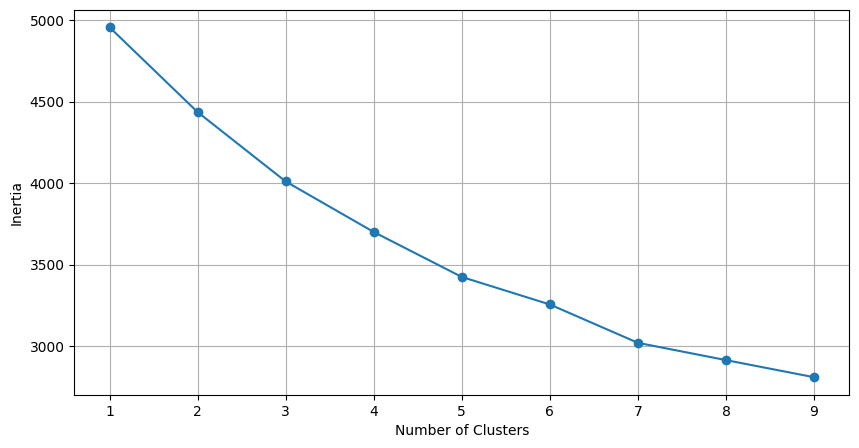

In [182]:
optimise_k_means(df[['T_Dekat_Sekolah', 'T_Dekat_Rumah_Sakit', 'T_Dekat_Pasar', 'T_Dekat_Rumah_Warga', 'T_Fasilitas_Umum_Masyarakat', 'T_Dilalui_Kendaraan_Umum', 'T_Kepadatan_Jalan', 'T_Dekat_Penginapan_Kost', 'T_Dekat_PT', 'T_Dekat_Rumah_Ibadah', 'T_Dekat_Stasiun', 'T_Dekat_Bandara','T_Dekat_Terminal']],10)

In [183]:
kmeans = KMeans(n_clusters=5)

In [184]:
kmeans.fit(df[['T_Dekat_Sekolah', 'T_Dekat_Rumah_Sakit', 'T_Dekat_Pasar', 'T_Dekat_Rumah_Warga', 'T_Fasilitas_Umum_Masyarakat', 'T_Dilalui_Kendaraan_Umum', 'T_Kepadatan_Jalan', 'T_Dekat_Penginapan_Kost', 'T_Dekat_PT', 'T_Dekat_Rumah_Ibadah', 'T_Dekat_Stasiun', 'T_Dekat_Bandara','T_Dekat_Terminal']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [165]:
import pickle

filename = 'model_1.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [166]:
df['kmeans_5'] = kmeans.labels_

In [167]:
df

,LATITUDE,LONGITUDE,ID,Dekat_Sekolah,Dekat_Rumah_Sakit,Dekat_Pasar,Dekat_Rumah_Warga,Fasilitas_Umum_Masyarakat,Dilalui_Kendaraan_Umum,Kepadatan_Jalan,...,T_Fasilitas_Umum_Masyarakat,T_Dilalui_Kendaraan_Umum,T_Kepadatan_Jalan,T_Dekat_Penginapan_Kost,T_Dekat_PT,T_Dekat_Rumah_Ibadah,T_Dekat_Stasiun,T_Dekat_Bandara,T_Dekat_Terminal,kmeans_5
0,-6.103911,106.939590,2.0,0,1,0,1,1,1,3,...,0.636209,0.666375,1.236275,-1.553455,-1.026999,0.807465,-0.412276,0.0,-0.157524,4
1,-6.109130,106.939307,3.0,1,0,0,1,1,0,1,...,0.636209,-1.500656,-1.732222,-1.553455,-1.026999,0.807465,-0.412276,0.0,-0.157524,4
2,-6.110013,106.926087,4.0,1,1,0,1,1,1,2,...,0.636209,0.666375,-0.247974,-1.553455,-1.026999,0.807465,-0.412276,0.0,-0.157524,4
3,-6.108875,106.929053,5.0,1,0,0,1,1,1,2,...,0.636209,0.666375,-0.247974,-1.553455,-1.026999,0.807465,-0.412276,0.0,-0.157524,4
4,-6.127213,106.917113,6.0,0,1,1,0,1,1,3,...,0.636209,0.666375,1.236275,-1.553455,-1.026999,-1.238444,-0.412276,0.0,-0.157524,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,-6.150627,106.778294,446.0,1,0,0,1,1,1,2,...,0.636209,0.666375,-0.247974,-1.553455,0.973711,0.807465,-0.412276,0.0,6.348228,3
443,-6.150482,106.781050,447.0,1,0,1,1,1,1,3,...,0.636209,0.666375,1.236275,-1.553455,0.973711,0.807465,-0.412276,0.0,6.348228,3
444,-6.178257,106.782487,448.0,1,0,1,1,1,1,3,...,0.636209,0.666375,1.236275,-1.553455,-1.026999,0.807465,-0.412276,0.0,-0.157524,2
445,-6.178203,106.785027,449.0,1,0,1,1,0,1,3,...,-1.571810,0.666375,1.236275,0.643726,-1.026999,-1.238444,-0.412276,0.0,-0.157524,2


In [185]:
df['kmeans_5'].value_counts()

4    147
1     97
0     92
2     67
3     10
Name: kmeans_5, dtype: int64

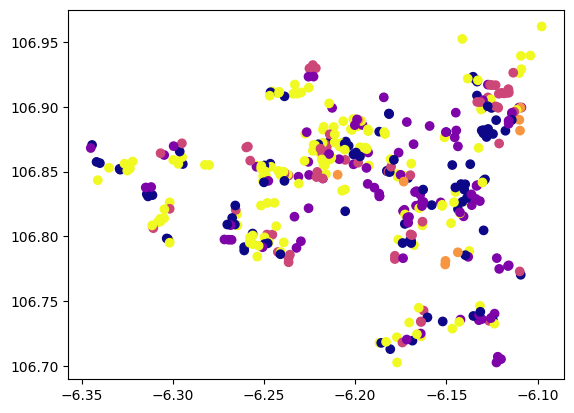

In [187]:
x_ = df['LATITUDE']
y_ = df['LONGITUDE']
label = df['kmeans_5']
plt.scatter(x_, y_, c = label, cmap = 'plasma')

In [188]:
df.to_csv('hasil_clustering.csv', index=False)

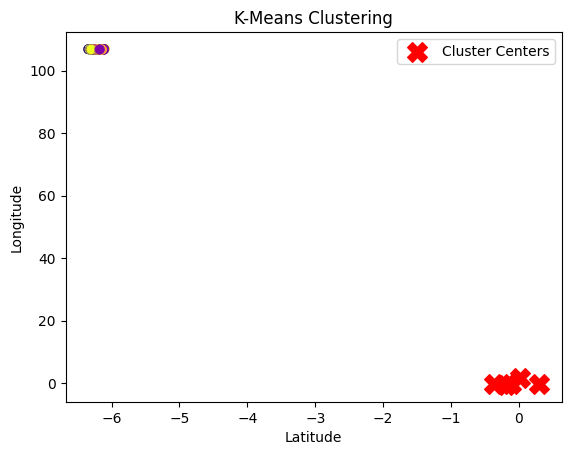

In [189]:
centers = kmeans.cluster_centers_

plt.scatter(x_, y_, c=label, cmap='plasma')
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, color='red', label='Cluster Centers')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [17]:
# Fungsi untuk mendapatkan input dari pengguna
def get_user_input():
    print("Masukkan nilai untuk setiap fitur (1 untuk Ya, 0 untuk Tidak), Khusus untuk kepadatan jalan (1 untuk Sepi, 2 untuk Sedang, 3 untuk Ramai):")

    # Pilihan jawaban untuk fitur tertentu
    pilihan_jawaban = lambda pertanyaan: int(input(f"{pertanyaan} (1/0): "))
    pilihan_jawaban_khusus = lambda pertanyaan: int(input(f"{pertanyaan} (1/2/3): "))

    # Misalnya, kita memiliki beberapa fitur dengan pilihan jawaban tertenntu
    nilai_dekat_sekolah = pilihan_jawaban("Dekat Sekolah")
    nilai_dekat_rumah_sakit = pilihan_jawaban("Dekat Rumah Sakit")
    nilai_dekat_pasar = pilihan_jawaban("Dekat Pasar")
    nilai_dekat_rumah_warga = pilihan_jawaban("Dekat Rumah Warga")
    nilai_fasilitas_umum_masyarakat = pilihan_jawaban("Fasilitas Umum Masyarakat")
    nilai_dilalui_kendaraan_umum = pilihan_jawaban("Dilalui Kendaraan Umum")
    nilai_kepadatan_jalan = pilihan_jawaban_khusus("Kepadatan Jalan")
    nilai_dekat_penginapan_kost = pilihan_jawaban("Dekat Penginapan Kost")
    nilai_dekat_pt = pilihan_jawaban("Dekat PT")
    nilai_dekat_rumah_ibadah = pilihan_jawaban("Dekat Rumah Ibadah")
    nilai_dekat_stasiun = pilihan_jawaban("Dekat Stasiun")
    nilai_dekat_bandara = pilihan_jawaban("Dekat Bandara")
    nilai_dekat_terminal = pilihan_jawaban("Dekat Terminal")

    user_data = {
        'Dekat_Sekolah': nilai_dekat_sekolah,
        'Dekat_Rumah_Sakit': nilai_dekat_rumah_sakit,
        'Dekat_Pasar': nilai_dekat_pasar,
        'Dekat_Rumah_Warga': nilai_dekat_rumah_warga,
        'Fasilitas_Umum_Masyarakat': nilai_fasilitas_umum_masyarakat,
        'Dilalui_Kendaraan_Umum': nilai_dilalui_kendaraan_umum,
        'Kepadatan_Jalan': nilai_kepadatan_jalan,
        'Dekat_Penginapan_Kost': nilai_dekat_penginapan_kost,
        'Dekat_PT': nilai_dekat_pt,
        'Dekat_Rumah_Ibadah': nilai_dekat_rumah_ibadah,
        'Dekat_Stasiun': nilai_dekat_stasiun,
        'Dekat_Bandara': nilai_dekat_bandara,
        'Dekat_Terminal': nilai_dekat_terminal
    }

    return user_data

# Melakukan fit scaler ke data pelatihan
scaler = StandardScaler()
scaler.fit(df[['Dekat_Sekolah', 'Dekat_Rumah_Sakit', 'Dekat_Pasar', 'Dekat_Rumah_Warga', 'Fasilitas_Umum_Masyarakat', 'Dilalui_Kendaraan_Umum', 'Kepadatan_Jalan', 'Dekat_Penginapan_Kost', 'Dekat_PT', 'Dekat_Rumah_Ibadah', 'Dekat_Stasiun', 'Dekat_Bandara','Dekat_Terminal']])

# Mendapatkan input dari pengguna
new_data = get_user_input()

# Skalakan data baru sesuai dengan skala yang sama dengan data pelatihan
new_data_scaled = scaler.transform(np.array(list(new_data.values())).reshape(1, -1))

# Prediksi cluster untuk data baru
predicted_cluster = kmeans.predict(new_data_scaled)

# Menambahkan kolom Predicted_Cluster ke data baru
new_data['Predicted_Cluster'] = predicted_cluster[0]

# Menampilkan hasil prediksi
print("\nHasil Prediksi:")
print(predicted_cluster)
print(new_data)

Masukkan nilai untuk setiap fitur (1 untuk Ya, 0 untuk Tidak), Khusus untuk kepadatan jalan (1 untuk Sepi, 2 untuk Sedang, 3 untuk Ramai):
Dekat Sekolah (1/0): 1
Dekat Rumah Sakit (1/0): 0
Dekat Pasar (1/0): 0
Dekat Rumah Warga (1/0): 1
Fasilitas Umum Masyarakat (1/0): 1
Dilalui Kendaraan Umum (1/0): 1
Kepadatan Jalan (1/2/3): 3
Dekat Penginapan Kost (1/0): 1
Dekat PT (1/0): 1
Dekat Rumah Ibadah (1/0): 0
Dekat Stasiun (1/0): 0
Dekat Bandara (1/0): 0
Dekat Terminal (1/0): 0

Hasil Prediksi:
[2]
{'Dekat_Sekolah': 1, 'Dekat_Rumah_Sakit': 0, 'Dekat_Pasar': 0, 'Dekat_Rumah_Warga': 1, 'Fasilitas_Umum_Masyarakat': 1, 'Dilalui_Kendaraan_Umum': 1, 'Kepadatan_Jalan': 3, 'Dekat_Penginapan_Kost': 1, 'Dekat_PT': 1, 'Dekat_Rumah_Ibadah': 0, 'Dekat_Stasiun': 0, 'Dekat_Bandara': 0, 'Dekat_Terminal': 0, 'Predicted_Cluster': 2}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [190]:
#Fungsi hitung jarak
def euclidean_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lat1 - lat2)**2 + (lon1 - lon2)**2)

def find_nearest_points(user_lat, user_lon, dataframe, user_cluster):
    #buat dataset baru
    cluster_df = dataframe[dataframe['kmeans_5'] == user_cluster].copy()
    #masukan data ke kolom distance dengan menghitung jarak
    cluster_df['distance'] = cluster_df.apply(
        lambda row: euclidean_distance(user_lat, user_lon, row['LATITUDE'], row['LONGITUDE']),
        axis=1
    )


    # Urut 5 terdekat
    nearest_points = cluster_df.nsmallest(5, 'distance')
    result_array = nearest_points[['LATITUDE', 'LONGITUDE']].to_numpy()

    return result_array

# Example: Get user input
#user_input_lat = float(input("Enter your latitude: "))
#user_input_lon = float(input("Enter your longitude:"))

input = [-6.228829, 106.847407]
nearest_points = find_nearest_points(input[0], input[1], df, user_cluster=3)

# Display the result
print("Top 5 Nearest Points:")
print(nearest_points)

Top 5 Nearest Points:
[[ -6.209601   106.847567  ]
 [ -6.199871   106.890225  ]
 [ -6.198224   106.889817  ]
 [ -6.173372   106.842269  ]
 [ -6.15048164 106.78105031]]


**Analisis Cluster**

**Cluster 0**

In [191]:
cluster_0 = df[df['kmeans_5'] == 0]
cluster_0.loc['total'] = cluster_0.sum()
cluster_0['cluster'] = 0
df_agre = pd.DataFrame(cluster_0.tail(1))
df_agre

<ipython-input-191-9d95f72c344b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_0.loc['total'] = cluster_0.sum()
<ipython-input-191-9d95f72c344b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_0['cluster'] = 0


,LATITUDE,LONGITUDE,ID,Dekat_Sekolah,Dekat_Rumah_Sakit,Dekat_Pasar,Dekat_Rumah_Warga,Fasilitas_Umum_Masyarakat,Dilalui_Kendaraan_Umum,Kepadatan_Jalan,...,T_Dilalui_Kendaraan_Umum,T_Kepadatan_Jalan,T_Dekat_Penginapan_Kost,T_Dekat_PT,T_Dekat_Rumah_Ibadah,T_Dekat_Stasiun,T_Dekat_Bandara,T_Dekat_Terminal,kmeans_5,cluster
total,-569.953374,9829.089695,19580.0,60,18,4,84,0,42,159,...,-47.045042,-59.919798,6.490464,3.550897,0.634083,-12.3889,0.0,-14.492233,0,0


**Cluster 1**

In [192]:
cluster_1 = df[df['kmeans_5'] == 1]
cluster_1.loc['total'] = cluster_1.sum()
cluster_1['cluster'] = 1

cluster_1[['LATITUDE', 'LONGITUDE', 'Dekat_Sekolah', 'Dekat_Rumah_Sakit', 'Dekat_Pasar', 'Dekat_Rumah_Warga', 'Fasilitas_Umum_Masyarakat', 'Dilalui_Kendaraan_Umum', 'Kepadatan_Jalan', 'Dekat_Penginapan_Kost', 'Dekat_PT', 'Dekat_Rumah_Ibadah', 'Dekat_Stasiun', 'Dekat_Bandara','Dekat_Terminal']]
df_agre1 = df_agre.append(cluster_1.tail(1))
df_agre1

<ipython-input-192-6c7985c47690>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1.loc['total'] = cluster_1.sum()
<ipython-input-192-6c7985c47690>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1['cluster'] = 1
<ipython-input-192-6c7985c47690>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_agre1 = df_agre.append(cluster_1.tail(1))


,LATITUDE,LONGITUDE,ID,Dekat_Sekolah,Dekat_Rumah_Sakit,Dekat_Pasar,Dekat_Rumah_Warga,Fasilitas_Umum_Masyarakat,Dilalui_Kendaraan_Umum,Kepadatan_Jalan,...,T_Dilalui_Kendaraan_Umum,T_Kepadatan_Jalan,T_Dekat_Penginapan_Kost,T_Dekat_PT,T_Dekat_Rumah_Ibadah,T_Dekat_Stasiun,T_Dekat_Bandara,T_Dekat_Terminal,kmeans_5,cluster
total,-569.953374,9829.089695,19580.0,60,18,4,84,0,42,159,...,-47.045042,-59.919798,6.490464,3.550897,0.634083,-12.388900,0.0,-14.492233,0,0
total,-599.355944,10362.586333,19622.0,50,34,17,0,86,76,231,...,19.130741,30.863745,-16.657083,28.426549,-19.879495,25.279403,0.0,-15.279854,97,1


**Cluster 2**

In [193]:
cluster_2 = df[df['kmeans_5'] == 2]
cluster_2.loc['total'] = cluster_2.sum()
cluster_2['cluster'] = 2

cluster_2[['LATITUDE', 'LONGITUDE', 'Dekat_Sekolah', 'Dekat_Rumah_Sakit', 'Dekat_Pasar', 'Dekat_Rumah_Warga', 'Fasilitas_Umum_Masyarakat', 'Dilalui_Kendaraan_Umum', 'Kepadatan_Jalan', 'Dekat_Penginapan_Kost', 'Dekat_PT', 'Dekat_Rumah_Ibadah', 'Dekat_Stasiun', 'Dekat_Bandara','Dekat_Terminal']]
df_agre2 = df_agre1.append(cluster_2.tail(1))
df_agre2

<ipython-input-193-52b601b606df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_2.loc['total'] = cluster_2.sum()
<ipython-input-193-52b601b606df>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_2['cluster'] = 2
<ipython-input-193-52b601b606df>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_agre2 = df_agre1.append(cluster_2.tail(1))


,LATITUDE,LONGITUDE,ID,Dekat_Sekolah,Dekat_Rumah_Sakit,Dekat_Pasar,Dekat_Rumah_Warga,Fasilitas_Umum_Masyarakat,Dilalui_Kendaraan_Umum,Kepadatan_Jalan,...,T_Dilalui_Kendaraan_Umum,T_Kepadatan_Jalan,T_Dekat_Penginapan_Kost,T_Dekat_PT,T_Dekat_Rumah_Ibadah,T_Dekat_Stasiun,T_Dekat_Bandara,T_Dekat_Terminal,kmeans_5,cluster
total,-569.953374,9829.089695,19580.0,60,18,4,84,0,42,159,...,-47.045042,-59.919798,6.490464,3.550897,0.634083,-12.388900,0.0,-14.492233,0,0
total,-599.355944,10362.586333,19622.0,50,34,17,0,86,76,231,...,19.130741,30.863745,-16.657083,28.426549,-19.879495,25.279403,0.0,-15.279854,97,1
total,-414.585013,7159.308165,16297.0,39,27,67,66,51,47,166,...,1.306515,30.881714,-11.799876,-10.788331,15.227901,-13.433333,0.0,-10.554126,134,2


**Cluster 3**

In [195]:
cluster_3 = df[df['kmeans_5'] == 3]
cluster_3.loc['total'] = cluster_3.sum()
cluster_3['cluster'] = 3

cluster_3[['LATITUDE', 'LONGITUDE', 'Dekat_Sekolah', 'Dekat_Rumah_Sakit', 'Dekat_Pasar', 'Dekat_Rumah_Warga', 'Fasilitas_Umum_Masyarakat', 'Dilalui_Kendaraan_Umum', 'Kepadatan_Jalan', 'Dekat_Penginapan_Kost', 'Dekat_PT', 'Dekat_Rumah_Ibadah', 'Dekat_Stasiun', 'Dekat_Bandara','Dekat_Terminal']]
df_agre3 = df_agre2.append(cluster_3.tail(1))
df_agre3

<ipython-input-195-2589c663f4ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_3.loc['total'] = cluster_3.sum()
<ipython-input-195-2589c663f4ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_3['cluster'] = 3
<ipython-input-195-2589c663f4ac>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_agre3 = df_agre2.append(cluster_3.tail(1))


,LATITUDE,LONGITUDE,ID,Dekat_Sekolah,Dekat_Rumah_Sakit,Dekat_Pasar,Dekat_Rumah_Warga,Fasilitas_Umum_Masyarakat,Dilalui_Kendaraan_Umum,Kepadatan_Jalan,...,T_Dilalui_Kendaraan_Umum,T_Kepadatan_Jalan,T_Dekat_Penginapan_Kost,T_Dekat_PT,T_Dekat_Rumah_Ibadah,T_Dekat_Stasiun,T_Dekat_Bandara,T_Dekat_Terminal,kmeans_5,cluster
total,-569.953374,9829.089695,19580.0,60,18,4,84,0,42,159,...,-47.045042,-59.919798,6.490464,3.550897,0.634083,-12.388900,0.0,-14.492233,0,0
total,-599.355944,10362.586333,19622.0,50,34,17,0,86,76,231,...,19.130741,30.863745,-16.657083,28.426549,-19.879495,25.279403,0.0,-15.279854,97,1
total,-414.585013,7159.308165,16297.0,39,27,67,66,51,47,166,...,1.306515,30.881714,-11.799876,-10.788331,15.227901,-13.433333,0.0,-10.554126,134,2
total,-61.554745,1068.487882,2468.0,4,2,3,6,10,10,23,...,6.663752,1.973008,-6.745826,1.734271,1.936926,10.066411,0.0,63.482281,30,3


**Cluster 4**

In [196]:
cluster_4 = df[df['kmeans_5'] == 4]
cluster_4.loc['total'] = cluster_4.sum()
cluster_4['cluster'] = 4

cluster_4[['LATITUDE', 'LONGITUDE', 'Dekat_Sekolah', 'Dekat_Rumah_Sakit', 'Dekat_Pasar', 'Dekat_Rumah_Warga', 'Fasilitas_Umum_Masyarakat', 'Dilalui_Kendaraan_Umum', 'Kepadatan_Jalan', 'Dekat_Penginapan_Kost', 'Dekat_PT', 'Dekat_Rumah_Ibadah', 'Dekat_Stasiun', 'Dekat_Bandara','Dekat_Terminal']]
df_agre4 = df_agre3.append(cluster_4.tail(1))
perb_clean =  df_agre4[['LATITUDE', 'LONGITUDE', 'Dekat_Sekolah', 'Dekat_Rumah_Sakit', 'Dekat_Pasar', 'Dekat_Rumah_Warga', 'Fasilitas_Umum_Masyarakat', 'Dilalui_Kendaraan_Umum', 'Kepadatan_Jalan', 'Dekat_Penginapan_Kost', 'Dekat_PT', 'Dekat_Rumah_Ibadah', 'Dekat_Stasiun', 'Dekat_Bandara','Dekat_Terminal', 'cluster']]

<ipython-input-196-ff1c316cdf82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_4.loc['total'] = cluster_4.sum()
<ipython-input-196-ff1c316cdf82>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_4['cluster'] = 4
<ipython-input-196-ff1c316cdf82>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_agre4 = df_agre3.append(cluster_4.tail(1))


In [132]:
perb_clean.to_csv('perbandingan_cluster_clean.csv', index=False)

***BATASAN***